In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import json, codecs
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D

# Data Prepare

In [9]:
# Train dataset
train = pd.read_csv("../Datasets/fashion_train.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Test dataset
test = pd.read_csv("../Datasets/fashion_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_train = train.drop(labels = ["label"], axis = 1)
x_test = test.drop(labels = ["label"], axis = 1)
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

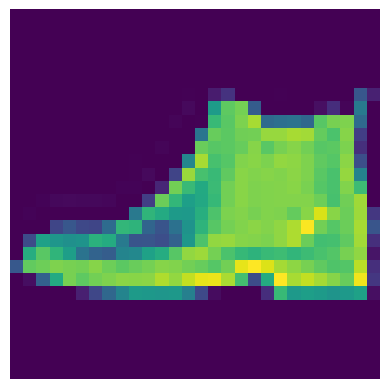

In [13]:
img = x_train.iloc[41000].to_numpy()
img = img.reshape((28,28))
plt.imshow(img)
plt.axis("off")
plt.show()

# Autoencoders <a id = "1"></a>


## The Simple Autoencoders

### Create Model

In [14]:
input_img = Input(shape = (784,))

encoded0 = Dense(32, activation = "relu")(input_img)

encoded1 = Dense(16, activation = "relu")(encoded0)

decoded0 = Dense(32, activation = "relu")(encoded1)

decoded1 = Dense(784, activation = "sigmoid")(decoded0)

sim_autoencoder = Model(input_img, decoded1)

sim_autoencoder.compile(optimizer = "rmsprop", loss = "binary_crossentropy")

In [15]:
# Structure of Model
sim_autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 52,064
Trainable params: 52,064
Non-trainable params: 0
_________________________________________________________________


### Train Model

In [16]:
sim_hist = sim_autoencoder.fit(x_train, x_train,
                      epochs = 100,
                      batch_size = 256,
                      shuffle = True,
                      validation_data = (x_train, x_train))

Epoch 1/100
235/235 [==============================] - 3s 5ms/step - loss: 0.4069 - val_loss: 0.3470
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3357 - val_loss: 0.3308
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3245 - val_loss: 0.3214
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3194 - val_loss: 0.3166
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3156 - val_loss: 0.3137
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3127 - val_loss: 0.3122
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3104 - val_loss: 0.3112
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3084 - val_loss: 0.3068
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3068 - val_loss: 0.3066
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3053 - val_lo

### Model Result Evaluation

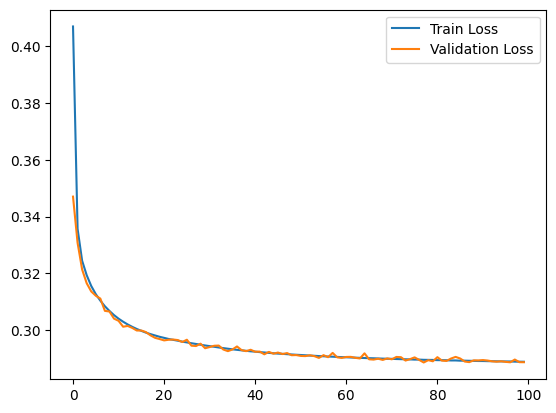

In [17]:
# Visualized the result of simple autoencoders
plt.plot(sim_hist.history["loss"], label = "Train Loss")
plt.plot(sim_hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

## Deep Autoencoder

### Create Model

In [18]:
# Create deep autoencoder model
deep_input_img = Input(shape = (784,))

deepencoded = Dense(256, activation = "relu")(deep_input_img)
deepencoded = Dense(128, activation = "relu")(deepencoded)
deepencoded = Dense(64, activation = "relu")(deepencoded)
deepencoded = Dense(32, activation = "relu")(deepencoded)

deepdecoded = Dense(64, activation = "relu")(deepencoded)
deepdecoded = Dense(128, activation = "relu")(deepdecoded)
deepdecoded = Dense(256, activation = "relu")(deepdecoded)
deepdecoded = Dense(784, activation = "sigmoid")(deepdecoded)

deep_autoencoder = Model(deep_input_img, deepdecoded)
deep_autoencoder.compile(optimizer = "rmsprop", loss = "binary_crossentropy")

In [19]:
# Structure of Model
deep_autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dense_9 (Dense)             (None, 128)               8320

### Train Model

In [20]:
deep_hist = deep_autoencoder.fit(x_train, x_train,
                                 epochs = 100,
                                 batch_size = 256,
                                 shuffle = True,
                                 validation_data = (x_train, x_train))

Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3866 - val_loss: 0.3344
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3323 - val_loss: 0.3274
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3193 - val_loss: 0.3141
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3124 - val_loss: 0.3107
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3075 - val_loss: 0.3101
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3037 - val_loss: 0.3019
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3008 - val_loss: 0.2981
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2985 - val_loss: 0.2980
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2965 - val_loss: 0.2948
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2949 - val_lo

### Model Result Evaluation

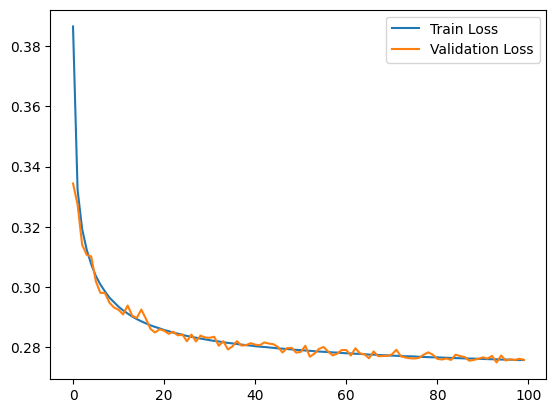

In [21]:
# Visualized the result of deep autoencoders
plt.plot(deep_hist.history["loss"], label = "Train Loss")
plt.plot(deep_hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

## Convolutional Autoencoder

### Prepare Data For Create Model

In [22]:
x_train_cnn = np.reshape(x_train.to_numpy(), (len(x_train), 28, 28, 1))
x_test_cnn = np.reshape(x_test.to_numpy(), (len(x_test), 28, 28, 1))

In [23]:
print("x_train_cnn shape: ", x_train_cnn.shape)
print("x_test_cnn shape: ", x_test_cnn.shape)

x_train_cnn shape:  (60000, 28, 28, 1)
x_test_cnn shape:  (10000, 28, 28, 1)


### Create Model

In [24]:
cnn_input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(cnn_input_img)
x = MaxPooling2D((2,2), padding = "same")(x)
x = Conv2D(8, (3,3), activation = "relu", padding = "same")(x)
x = MaxPooling2D((2,2), padding = "same")(x)
x = Conv2D(8, (3,3), activation = "relu", padding = "same")(x)
cnn_encoded = MaxPooling2D((2,2), padding = "same")(x)

x = Conv2D(8, (3,3), activation = "relu", padding = "same")(cnn_encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation = "relu", padding = "same")(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation = "relu")(x)
x = UpSampling2D((2,2))(x)
cnn_decoded = Conv2D(1, (3,3), activation = "sigmoid", padding = "same")(x)

cnn_autoencoder = Model(cnn_input_img, cnn_decoded)
cnn_autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy")

### Train Model

In [25]:
cnn_hist = cnn_autoencoder.fit(x_train_cnn, x_train_cnn,
                              epochs = 100,
                              batch_size = 256,
                              shuffle = True,
                              validation_data = (x_test_cnn, x_test_cnn))

Epoch 1/100
235/235 [==============================] - 8s 17ms/step - loss: 0.4012 - val_loss: 0.3203
Epoch 2/100
235/235 [==============================] - 4s 15ms/step - loss: 0.3140 - val_loss: 0.3075
Epoch 3/100
235/235 [==============================] - 3s 15ms/step - loss: 0.3060 - val_loss: 0.3024
Epoch 4/100
235/235 [==============================] - 3s 15ms/step - loss: 0.3015 - val_loss: 0.2985
Epoch 5/100
235/235 [==============================] - 3s 15ms/step - loss: 0.2985 - val_loss: 0.2960
Epoch 6/100
235/235 [==============================] - 3s 15ms/step - loss: 0.2965 - val_loss: 0.2943
Epoch 7/100
235/235 [==============================] - 4s 15ms/step - loss: 0.2950 - val_loss: 0.2932
Epoch 8/100
235/235 [==============================] - 3s 15ms/step - loss: 0.2938 - val_loss: 0.2923
Epoch 9/100
235/235 [==============================] - 4s 15ms/step - loss: 0.2927 - val_loss: 0.2910
Epoch 10/100
235/235 [==============================] - 3s 15ms/step - loss: 0.291

### Model Result Evaluation

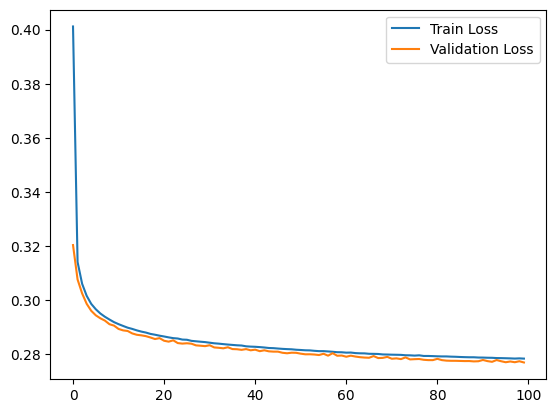

In [26]:
# Visualized the result of model
plt.plot(cnn_hist.history["loss"], label = "Train Loss")
plt.plot(cnn_hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

## Application To Image Denoising

### Change Dataset

In [27]:
# Image Denoise
noise_factor = 0.5
x_train_noisy = x_train_cnn + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train_cnn.shape)
x_test_noisy = x_test_cnn + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_cnn.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

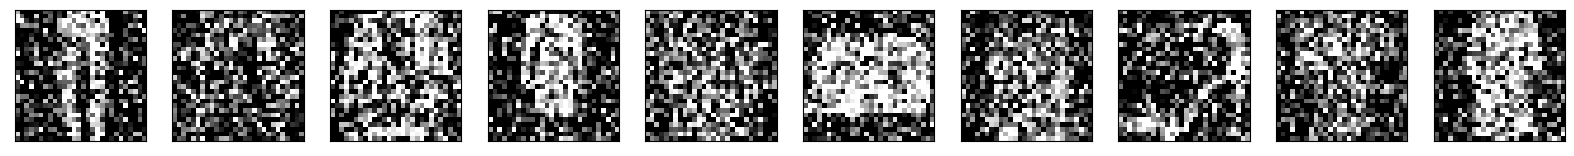

In [28]:
n = 10
plt.figure(figsize = (20,2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Train Model

In [29]:
cnn_Aid_hist = cnn_autoencoder.fit(x_train_noisy, x_train_noisy,
                                   epochs = 100,
                                   batch_size = 256,
                                   shuffle = True,
                                   validation_data = (x_test_noisy, x_test_noisy))

Epoch 1/100
235/235 [==============================] - 4s 15ms/step - loss: 0.5712 - val_loss: 0.5669
Epoch 2/100
235/235 [==============================] - 4s 15ms/step - loss: 0.5660 - val_loss: 0.5646
Epoch 3/100
235/235 [==============================] - 4s 15ms/step - loss: 0.5643 - val_loss: 0.5634
Epoch 4/100
235/235 [==============================] - 3s 15ms/step - loss: 0.5633 - val_loss: 0.5624
Epoch 5/100
235/235 [==============================] - 3s 15ms/step - loss: 0.5624 - val_loss: 0.5616
Epoch 6/100
235/235 [==============================] - 3s 15ms/step - loss: 0.5615 - val_loss: 0.5608
Epoch 7/100
235/235 [==============================] - 3s 15ms/step - loss: 0.5608 - val_loss: 0.5601
Epoch 8/100
235/235 [==============================] - 3s 15ms/step - loss: 0.5602 - val_loss: 0.5597
Epoch 9/100
235/235 [==============================] - 3s 15ms/step - loss: 0.5597 - val_loss: 0.5590
Epoch 10/100
235/235 [==============================] - 3s 15ms/step - loss: 0.559

### Model Result Evaluation

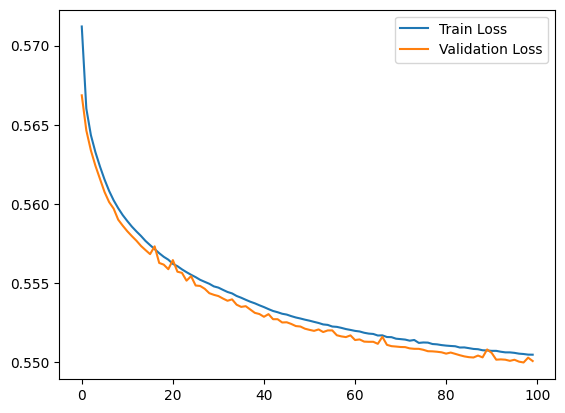

In [30]:
plt.plot(cnn_Aid_hist.history["loss"], label = "Train Loss")
plt.plot(cnn_Aid_hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()